# Neural networks from scratch

## using Forward and Backward propagation

In [1]:
#import libraries which are required
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import make_circles

In [2]:
dataset=make_circles()

In [3]:
data=dataset[0]
target=dataset[1]
circles=pd.DataFrame(data,columns=["x1","x2"])
circles["target"]=target

In [4]:
circles.head()

,x1,x2,target
0,0.428661,0.675462,1
1,0.637424,-0.770513,0
2,-0.793692,-0.100267,1
3,-0.701045,0.385403,1
4,-0.535827,0.844328,0


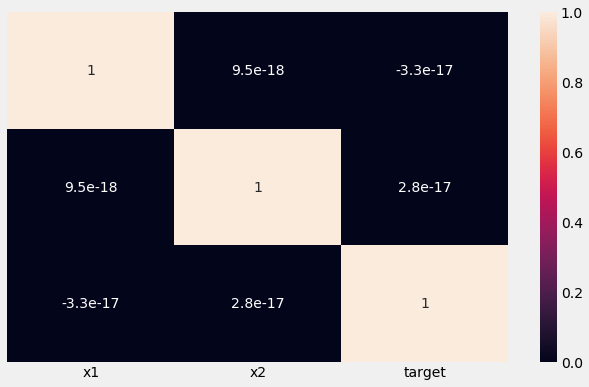

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(circles.corr(),yticklabels=False,annot=True)

<Figure size 720x432 with 0 Axes>

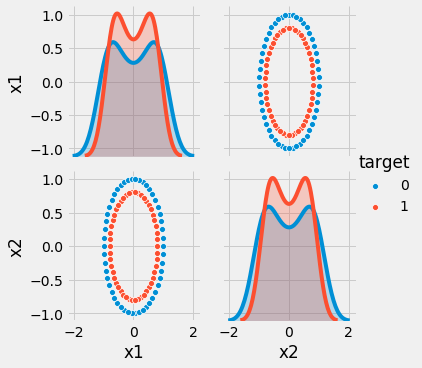

In [6]:
plt.figure(figsize=(10,6))
sns.pairplot(circles,hue="target")

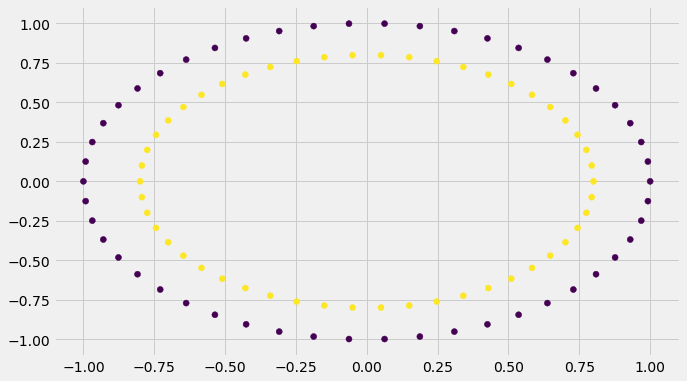

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(circles["x1"],circles["x2"],c=circles["target"])

In [8]:
x=np.array(circles.drop(["target"],axis=1))
y=np.array(circles["target"])

In [9]:
x_shape=x.shape
y_shape=y.shape
m=x.shape[0]
print(f"x shape is {x_shape}")
print(f"y shape is {y_shape}")
print(f"no of training examples {m}")

x shape is (100, 2)
y shape is (100,)
no of training examples 100


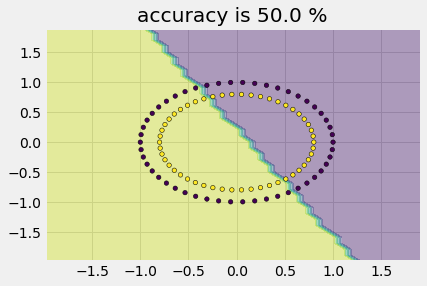

[[ 5 10]
 [ 5 10]]
              precision    recall  f1-score   support

           0       0.50      0.33      0.40        15
           1       0.50      0.67      0.57        15

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.49        30
weighted avg       0.50      0.50      0.49        30



In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=32,test_size=0.3)
logistic=LogisticRegression()
logistic.fit(x_train,y_train)
y_pred=logistic.predict(x_test)
acc=accuracy_score(y_test,y_pred)
x_min,x_max=x_train[:,0].min()-1,x_train[:,0].max()+1
y_min,y_max =x_train[:,1].min()-1,x_train[:, 1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),
                     np.arange(x_min,x_max,0.1))
z=logistic.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)
plt.contourf(xx,yy,z,alpha=0.4)
plt.scatter(x[:,0],x[:,1],c=y,s=20,edgecolor='k')
plt.title(f"accuracy is {round(acc,4)*100} %")
plt.show()
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

# Neural networks

## Layer sizes

In [11]:
def layer_sizes(X,Y):
    """
      input layer is 2 features
      first hidden layer contains 4 neurons
      output layer is one value
      
    """
    input_layer_size=X.shape[0]
    hidden_layer_size=4
    output_layer_size=Y.shape[0]
    return (input_layer_size,hidden_layer_size,output_layer_size)

In [12]:
x=np.array(circles.drop(["target"],axis=1))
y=np.array(circles["target"])
x=x.reshape(x.shape[1],x.shape[0])
y=y.reshape(1,y.shape[0])
i,h,o=layer_sizes(x,y)
print(f"input layer size is {i}")
print(f"hidden layer size is {h}")
print(f"output layer size is {o}")

input layer size is 2
hidden layer size is 4
output layer size is 1


## Initialize the model's parameters

In [13]:
def initialize_parameters(i,h,o):
    
    """
       initializing the parameters w1,w2,b1,b2
       
    """
    
    W1 = np.random.randn(h,i)*0.01
    b1 = np.zeros((h,1))
    W2 = np.random.randn(o,h)*0.01
    b2 = np.zeros((o,1))
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

In [14]:
i,h,o=layer_sizes(x,y)
initialize_parameters(i,h,o)

{'W1': array([[ 0.00894364,  0.00861152],
        [-0.00400312,  0.00014886],
        [-0.00330953,  0.01110127],
        [ 0.00785431,  0.00089802]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.]]),
 'W2': array([[-0.0162    ,  0.00604196, -0.01443756, -0.00795991]]),
 'b2': array([[0.]])}

## let's do forward propagation

$ sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}} $

$ tanh( w^T x + b) = \frac{e^{(w^T x + b)}-e^{-(w^T x + b)}}{e^{(w^T x + b)}+e^{-(w^T x + b)}} $

In [15]:
def forward_propagation(X,parametrs):
    
    #load the parameters
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    #compute Z and A values
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2=1/(1+np.exp(-Z2))
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2,cache

In [16]:
i,h,o=layer_sizes(x,y)
parameters=initialize_parameters(i,h,o)
A2,cache=forward_propagation(x,parameters)

## compute cost function 

$ \hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})  $

$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)}) $

$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)}) $

$ J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\ $

In [17]:
def compute_cost(A2,Y,parameters):
    
    m=Y.shape[1]
    
    cost=-np.sum((np.dot(np.log(A2),Y.T)+np.dot(np.log(1-A2),(1-Y).T)))/m
    
    cost=float(np.squeeze(cost))
    
    return cost

In [18]:
i,h,o=layer_sizes(x,y)
parameters=initialize_parameters(i,h,o)
A2,cache=forward_propagation(x,parameters)
cost=compute_cost(A2,y,parameters)
print(f"cost is {cost}")

cost is 0.6931709371570887


## let's do backward propagation

In [19]:
def backward_propagation(X,Y,cache,parameters):
    
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]

    dZ2 = np.subtract(A2,Y)
    dW2 = np.dot(dZ2,A1.T)/m
    db2 = (np.sum(dZ2,axis=1,keepdims=True))/m
    dZ1 = np.dot(W2.T,dZ2)*(1-np.power(A1,2))
    dW1 = np.dot(dZ1,X.T)/m
    db1 = (np.sum(dZ1,axis=1,keepdims=True))/m
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [20]:
i,h,o=layer_sizes(x,y)
parameters=initialize_parameters(i,h,o)
A2,cache=forward_propagation(x,parameters)
grads=backward_propagation(x,y,cache,parameters)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[-2.31964648e-04 -1.23091145e-04]
 [-1.53168403e-04 -8.12754305e-05]
 [ 2.58469512e-04  1.37136873e-04]
 [-3.23994719e-04 -1.71920549e-04]]
db1 = [[-3.22994895e-09]
 [-5.81377915e-09]
 [ 2.58199189e-08]
 [-1.28849157e-08]]
dW2 = [[ 9.42196504e-05  8.12578521e-05  8.14997408e-04 -4.19313424e-05]]
db2 = [[2.0706791e-06]]


## let's apply Gradient descent(update the parameters)

$ \theta = \theta - \alpha \frac{\partial J }{ \partial \theta } $

In [21]:
def update_parameters(parameters,grads,lr):
    
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1-lr*dW1
    b1 = b1-lr*db1
    W2 = W2-lr*dW2
    b2 = b2-lr*db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

In [22]:
i,h,o=layer_sizes(x,y)
parameters=initialize_parameters(i,h,o)
A2,cache=forward_propagation(x,parameters)
grads=backward_propagation(x,y,cache,parameters)
parameters=update_parameters(parameters,grads,lr=0.5)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.0013792   0.00746316]
 [-0.01722412  0.00236971]
 [-0.02565383  0.00651033]
 [ 0.01566145  0.00879961]]
b1 = [[ 1.87218373e-10]
 [ 1.01679024e-08]
 [-5.28274215e-09]
 [ 6.43853324e-09]]
W2 = [[-0.00135229 -0.00716127  0.00576611 -0.00230992]]
b2 = [[-2.7113267e-07]]


## let's combine all parts

In [23]:
class ANN:
    
    def __init__(self,X,Y,h,h1,learning_rate,iterations,verbose=False):
        
        self.X = X
        self.Y = Y
        self.h = h
        self.h1 = h1
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.verbose = verbose
        
        #in this model iam using 2 hidden layers
        
    def layer_sizes(self,X,Y):
        input_layer_size=X.shape[0]
        hidden_layer_size=self.h
        hidden_layer_size1=self.h1
        output_layer_size=Y.shape[0]
        return (input_layer_size,hidden_layer_size,hidden_layer_size1,output_layer_size)
    
    def initialize_parameters(self,i,o):
        W1 = np.random.randn(self.h,i)*0.01
        b1 = np.zeros((self.h,1))
        W2 = np.random.randn(self.h1,self.h)*0.01
        b2 = np.zeros((self.h1,1))
        W3 = np.random.randn(o,self.h1)*0.01
        b3 = np.zeros((o,1))
        parameters = {"W1": W1,
                      "b1": b1,
                      "W2": W2,
                      "b2": b2,
                      "W3": W3,
                      "b3": b3}
        return parameters
    
    def forward_propagation(self,X,parameters):
    
        #load the parameters
        W1 = parameters['W1']
        b1 = parameters['b1']
        W2 = parameters['W2']
        b2 = parameters['b2']
        W3 = parameters["W3"]
        b3 = parameters["b3"]

        #compute Z and A values
        Z1 = np.dot(W1,X)+b1
        A1 = np.tanh(Z1)
        Z2 = np.dot(W2,A1)+b2
        A2 = np.tanh(Z2)
        Z3 = np.dot(W3,A2)+b3
        A3=1/(1+np.exp(-Z3))
        cache = {"Z1": Z1,
                 "A1": A1,
                 "Z2": Z2,
                 "A2": A2,
                 "Z3": Z3,
                 "A3": A3}

        return A3,cache
    
    def compute_cost(self,A3,Y,parameters):
    
        m=Y.shape[1]

        cost=-np.sum((np.dot(np.log(A3),Y.T)+np.dot(np.log(1-A3),(1-Y).T)))/m

        cost=float(np.squeeze(cost))

        return cost
    
    def backward_propagation(self,X,Y,cache,parameters):
    
        m=X.shape[1]

        W1=parameters["W1"]
        W2=parameters["W2"]
        W3=parameters["W3"]

        A1 = cache["A1"]
        A2 = cache["A2"]
        A3 = cache["A3"]
        
        dZ3=np.subtract(A3,Y)
        dW3=np.dot(dZ3,A2.T)
        db3=(np.sum(dZ3,axis=1,keepdims=True))/m
        dZ2=np.dot(W3.T,dZ3)*(1-np.power(A2,2))
        dW2=np.dot(dZ2,A1.T)/m
        db2=(np.sum(dZ2,axis=1,keepdims=True))/m
        dZ1=np.dot(W2.T,dZ2)*(1-np.power(A1,2))
        dW1=np.dot(dZ1,X.T)/m
        db1=(np.sum(dZ1,axis=1,keepdims=True))/m

        grads = {"dW1": dW1,
                 "db1": db1,
                 "dW2": dW2,
                 "db2": db2,
                 "dW3": dW3,
                 "db3": db3}
    
        return grads

    def update_parameters(self,parameters,grads,lr):
    
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        W3 = parameters["W3"]
        b3 = parameters["b3"]

        dW1 = grads["dW1"]
        db1 = grads["db1"]
        dW2 = grads["dW2"]
        db2 = grads["db2"]
        dW3 = grads["dW3"]
        db3 = grads["db3"]

        W1 = W1-lr*dW1
        b1 = b1-lr*db1
        W2 = W2-lr*dW2
        b2 = b2-lr*db2
        W3 = W3-lr*dW3
        b3 = b3-lr*db3

        parameters = {"W1": W1,
                      "b1": b1,
                      "W2": W2,
                      "b2": b2,
                      "W3": W3,
                      "b3": b3}
        return parameters
    
    def process(self):
        
        np.random.seed(3)
        i=self.layer_sizes(self.X,self.Y)[0]
        o=self.layer_sizes(self.X,self.Y)[3]
        self.parameters=self.initialize_parameters(i=i,o=o)
        self.cost_error=[]
        
        for j in range(self.iterations):
                
            self.A3,self.cache=self.forward_propagation(self.X,self.parameters)
            
            cost=self.compute_cost(self.A3,self.Y,self.parameters)
            
            self.grads=self.backward_propagation(self.X,self.Y,self.cache,self.parameters)
            
            self.parameters=self.update_parameters(self.parameters,self.grads,self.learning_rate)
            
            s=1000
            if self.verbose and (j%s==0):
                y_pred=self.predictions(X)
                acc=accuracy_score(self.Y[0],y_pred)*100
                self.cost_error.append(cost)
                print(f"cost at {j} iteration is ====> {cost} and accuracy score is {acc}")

        return self.cost_error
    
    def predictions(self,X):
            A3,cache=self.forward_propagation(X,self.parameters)
            predictions = []
            for i in range(len(A3[0])):
                if (A3[0][i]>0.5).any():
                    predictions.append(1)
                else:
                    predictions.append(0)
            predictions=np.array(predictions)
            return predictions
    
    def hypothesis(self,X,Y):
        x_min,x_max=x[:,0].min()-1,x[:,0].max()+1
        y_min,y_max =x[:,1].min()-1,x[:, 1].max()+1
        xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),
                             np.arange(x_min,x_max,0.1))
        z=self.predictions(np.c_[xx.ravel(),yy.ravel()].T)
        z=z.reshape(xx.shape)
        plt.contourf(xx,yy,z,alpha=0.4)
        plt.scatter(x[:,0],x[:,1],c=y,s=20,edgecolor='k')
        plt.show()
        

In [24]:
X=np.array(circles.drop(["target"],axis=1))
Y=np.array(circles["target"])
X=X.reshape(X.shape[1],X.shape[0])
Y=Y.reshape(1,Y.shape[0])
model=ANN(X,Y,h=12,h1=8,learning_rate=0.3,iterations=30000,verbose=True)
c=model.process()
y_pred=model.predictions(X)

cost at 0 iteration is ====> 0.6931471947436595 and accuracy score is 52.0
cost at 1000 iteration is ====> 0.6785447487192781 and accuracy score is 54.0
cost at 2000 iteration is ====> 0.678414197375063 and accuracy score is 54.0
cost at 3000 iteration is ====> 0.6776873901954983 and accuracy score is 56.00000000000001
cost at 4000 iteration is ====> 0.6712472043778681 and accuracy score is 54.0
cost at 5000 iteration is ====> 0.6661895135116476 and accuracy score is 57.99999999999999
cost at 6000 iteration is ====> 0.6572562622667663 and accuracy score is 56.99999999999999
cost at 7000 iteration is ====> 0.6380608559686427 and accuracy score is 63.0
cost at 8000 iteration is ====> 0.612768422325647 and accuracy score is 65.0
cost at 9000 iteration is ====> 0.5911813588256538 and accuracy score is 74.0
cost at 10000 iteration is ====> 0.5732371543426461 and accuracy score is 72.0
cost at 11000 iteration is ====> 0.5515648934167392 and accuracy score is 73.0
cost at 12000 iteration is =

In [25]:
plt.ion()
%matplotlib qt
for i in range(1,len(c)):
    x=range(0,i)
    y=c[0:i]
    plt.plot(x,y)
    plt.ylabel("cost function error")
    plt.xlabel("cost function for every 1000 iterations")
    plt.title(str(i))
    plt.draw()
    plt.pause(0.1)
plt.show(block=True)

In [26]:
print(confusion_matrix(Y[0],y_pred))
print(classification_report(Y[0],y_pred))
print(f"Accuracy score is {accuracy_score(Y[0],y_pred)*100} %")

[[49  1]
 [ 1 49]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.98      0.98      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

Accuracy score is 98.0 %
